In [1]:
import pandas as pd
import numpy as np
import pickle
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

import warnings; warnings.simplefilter('ignore')
from model_process import *

%matplotlib inline

In [2]:
df = pd.read_csv('newrate.csv')

In [3]:
df.drop(columns =['Unnamed: 0','Unnamed: 0.1' ], inplace = True)

In [4]:
df.head()

,Date,Number,Movie,moviename,score,Year
0,2022-09-07T18:53:14,15531,GET /rate/hey+happy+2001,hey+happy,3,2001
1,2022-09-07T18:54:15,138100,GET /rate/keeping+the+promise+1997,keeping+the+promise,4,1997
2,2022-09-07T18:54:26,152907,GET /rate/a+boy+called+hate+1996,a+boy+called+hate,3,1996
3,2022-09-07T18:55:35,195501,GET /rate/dead+tired+1994,dead+tired,4,1994
4,2022-09-07T18:56:47,50030,GET /rate/le+nouveau+jean-claude+2002,le+nouveau+jean-claude,3,2002


In [9]:
filet = open('./finalized_modelA.pkl','rb')
algo = pickle.load(filet)
metadata = df
df['label_value'] = 0.0
df['id'] = range(0, len(df))


In [23]:
for i in range(len(df)):
    #print(df.iloc[i]['Number'])
    df['label_value'][i] = (predict_review(df.iloc[i]['Number'], df.iloc[i]['moviename'], algo, metadata))
    #if i > 10000:
    #    break
df

,Date,Number,Movie,moviename,score,Year,Era,label_value,Average RMSE
0,2022-09-07T18:53:14,15531,GET /rate/hey+happy+2001,hey+happy,3,2001,2000.0,3.77452,0.77452
1,2022-09-07T18:54:15,138100,GET /rate/keeping+the+promise+1997,keeping+the+promise,4,1997,1950.0,3.77452,0.22548
2,2022-09-07T18:54:26,152907,GET /rate/a+boy+called+hate+1996,a+boy+called+hate,3,1996,1950.0,3.77452,0.77452
3,2022-09-07T18:55:35,195501,GET /rate/dead+tired+1994,dead+tired,4,1994,1950.0,3.77452,0.22548
4,2022-09-07T18:56:47,50030,GET /rate/le+nouveau+jean-claude+2002,le+nouveau+jean-claude,3,2002,2000.0,3.77452,0.77452
...,...,...,...,...,...,...,...,...,...
137224,2022-08-18T17:07:44,190514,GET /rate/the+lion+king+1994,the+lion+king,5,1994,1950.0,3.77452,1.22548
137225,2022-08-18T17:09:30,109806,GET /rate/ed+wood+1994,ed+wood,5,1994,1950.0,3.77452,1.22548
137226,2022-08-18T19:35:23,172756,GET /rate/the+godfather+1972,the+godfather,4,1972,1950.0,3.77452,0.22548
137227,2022-08-18T20:51:28,5005,GET /rate/pirates+of+the+caribbean+the+curse+o...,pirates+of+the+caribbean+the+curse+of+the+blac...,5,2003,2000.0,3.77452,1.22548


In [24]:
df['Year'] = (df['Year'].astype(int))

In [28]:
df['Year'].max()

2014

In [13]:
df.loc[(df['Year'] >= 1950) &  (df['Year'] < 2000), 'Era'] = 1950

In [14]:
df['Era'].unique()


array([2000., 1950., 1900., 1800.])

In [58]:
df.drop(columns = ['Date', 'Movie'],inplace =True)

In [16]:
df.columns

Index(['Date', 'Number', 'Movie', 'moviename', 'score', 'Year', 'Era'], dtype='object')

In [69]:
dt = df.drop(columns = ['Number', 'id', 'Era'])

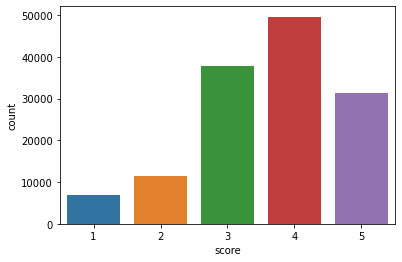

In [21]:
by_age = sns.countplot(x="score", data=df,)

In [72]:
df_2000 = df[df['Era'] == 2000]

In [19]:
df['Average RMSE'] = abs(df['score'] - df['label_value'])

In [20]:
df.groupby('Era').mean()

,Number,score,Year,label_value,Average RMSE
Era,,,,,
1800.0,67568.500000,3.500000,1897.000000,3.77452,0.500000
1900.0,114580.939793,3.908443,1939.699679,3.77452,0.848900
1950.0,115269.542944,3.615449,1989.918167,3.77452,0.870338
2000.0,115608.104700,3.675265,2003.957346,3.77452,0.838241


In [88]:
min_movie_ratings = 2
filter_movies = df['moviename'].value_counts() < min_movie_ratings
filter_movies = filter_movies[filter_movies].index.tolist()

array([2000, 1950, 1900, nan, '1900'], dtype=object)

In [97]:
df.to_csv('predictrate.csv')